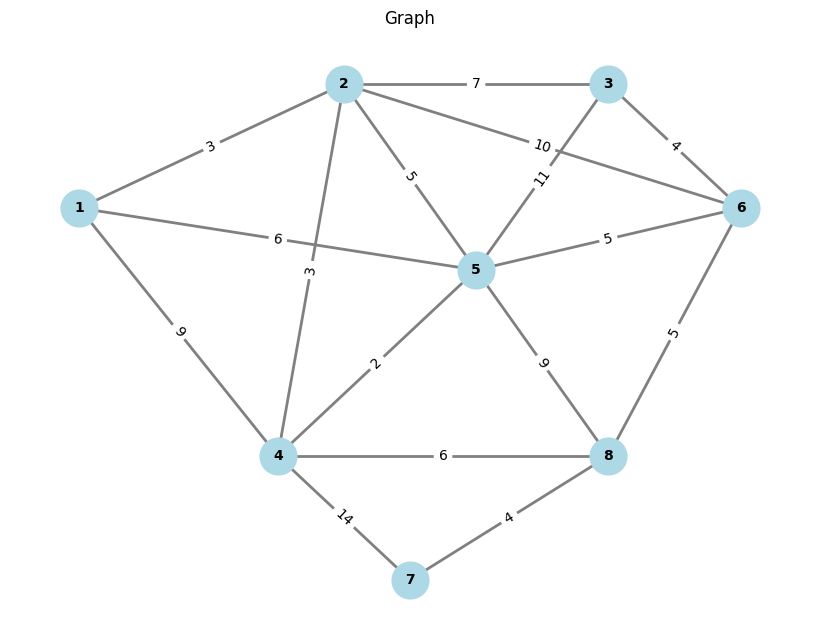

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx


G = nx.Graph()

edges = [
    (1, 2, 3), (1, 4, 9), (1, 5, 6), (2, 3, 7), (2, 5, 5), (2, 6 ,10), (2, 4, 3), (3, 5, 11),
    (3, 6, 4), (4, 5, 2), (4, 7, 14), (4, 8, 6), (5, 6, 5),
    (5, 8, 9), (6, 8, 5), (7, 8, 4)
]

G.add_weighted_edges_from(edges)

positions = {
    1: (-3, 2), 2: (-1, 3), 3: (1, 3), 4: (-1.5, 0), 5: (0, 1.5),
    6: (2, 2), 7: (-0.5, -1), 8: (1, 0)
}

plt.figure(figsize=(8, 6))
nx.draw(G, pos=positions, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray", width=2)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels, font_size=10)
plt.title("Graph")
plt.show()

In [ ]:
# Найдите кратчайший путь между вершинами 1–4, 1–8, 2–7, 1–7

shortest_path_1_4 = nx.dijkstra_path(G, 1, 4, weight='weight')
shortest_path_length_1_4 = nx.dijkstra_path_length(G, 1, 4, weight='weight')

shortest_path_1_8 = nx.dijkstra_path(G, 1, 8, weight='weight')
shortest_path_length_1_8 = nx.dijkstra_path_length(G, 1, 8, weight='weight')

shortest_path_2_7 = nx.dijkstra_path(G, 2, 7, weight='weight')
shortest_path_length_2_7 = nx.dijkstra_path_length(G, 2, 7, weight='weight')

shortest_path_1_7 = nx.dijkstra_path(G, 1, 7, weight='weight')
shortest_path_length_1_7 = nx.dijkstra_path_length(G, 1, 7, weight='weight')

(shortest_path_1_4, shortest_path_length_1_4,
 shortest_path_1_8, shortest_path_length_1_8,
 shortest_path_2_7, shortest_path_length_2_7,
 shortest_path_1_7, shortest_path_length_1_7)


([1, 2, 4], 6, [1, 2, 4, 8], 12, [2, 4, 8, 7], 13, [1, 2, 4, 8, 7], 16)

In [ ]:
dfs_edges = list(nx.dfs_edges(G, source=1))
dfs_nodes = list(nx.dfs_preorder_nodes(G, source=1))

dfs_edges, dfs_nodes

([(1, 2), (2, 3), (3, 5), (5, 4), (4, 7), (7, 8), (8, 6)],
 [1, 2, 3, 5, 4, 7, 8, 6])

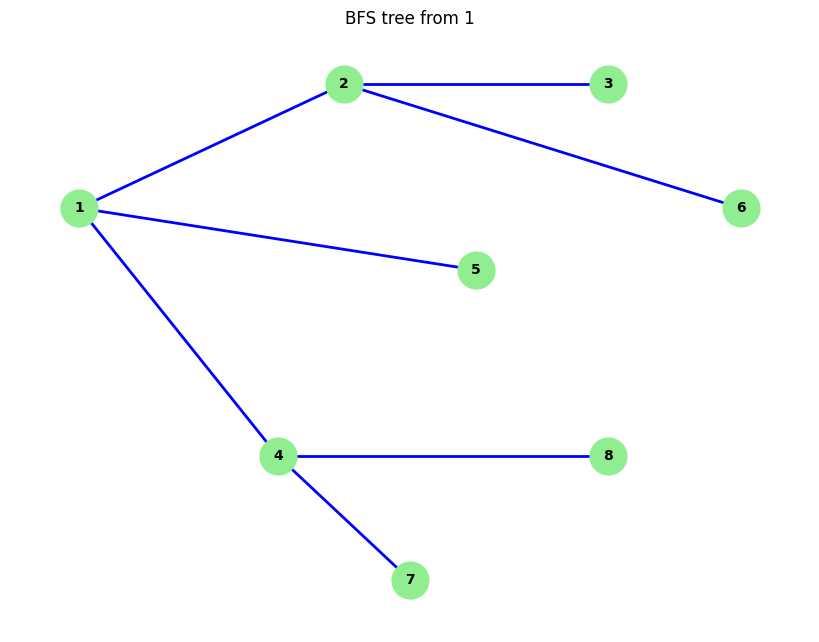

In [ ]:
bfs_edges = list(nx.bfs_edges(G, source=1))
bfs_nodes = list(nx.bfs_tree(G, source=1))

bfs_edges, bfs_nodes

bfs_tree = nx.Graph()
bfs_tree.add_edges_from(bfs_edges)

plt.figure(figsize=(8, 6))
nx.draw(bfs_tree, pos=positions, with_labels=True, node_size=700, node_color="lightgreen", font_size=10, font_weight="bold", edge_color="blue", width=2)
plt.title("BFS tree from 1")
plt.show()

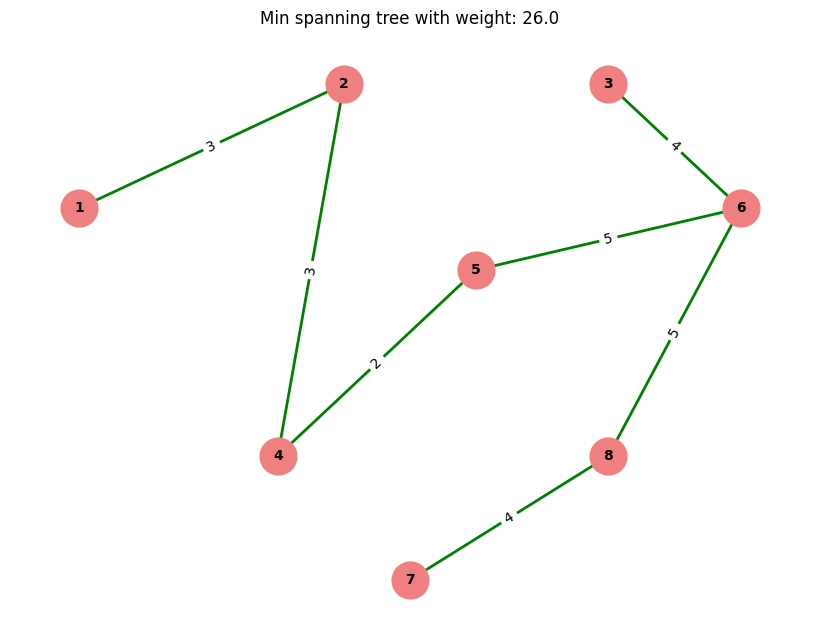

26.0

In [ ]:
mst = nx.minimum_spanning_tree(G, weight='weight')

mst_weight = mst.size(weight='weight')

plt.figure(figsize=(8, 6))
nx.draw(mst, pos=positions, with_labels=True, node_size=700, node_color="lightcoral", font_size=10, font_weight="bold", edge_color="green", width=2)
edge_labels_mst = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos=positions, edge_labels=edge_labels_mst, font_size=10)
plt.title(f"Min spanning tree with weight: {mst_weight}")
plt.show()

mst_weight

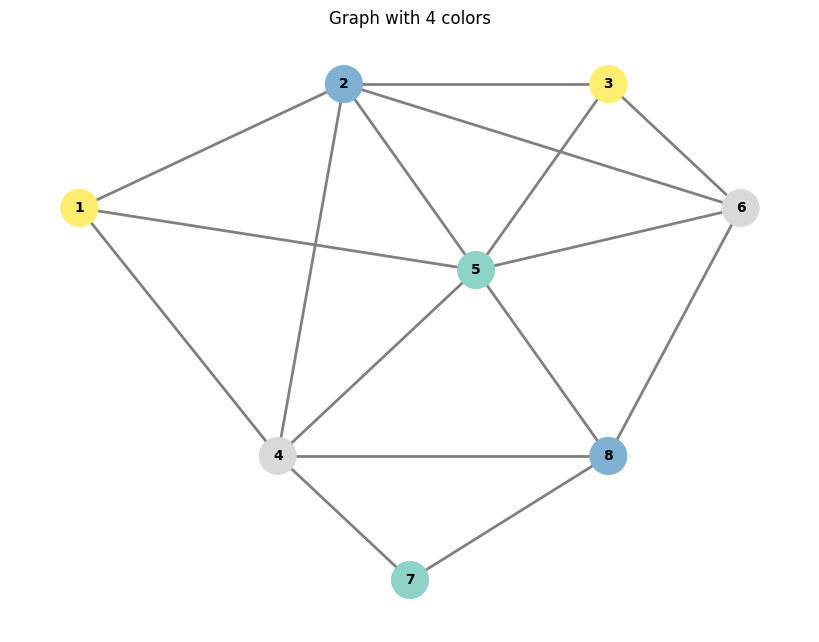

4

In [ ]:
coloring = nx.coloring.greedy_color(G, strategy="largest_first")

num_colors = max(coloring.values()) + 1

plt.figure(figsize=(8, 6))
node_colors = [coloring[node] for node in G.nodes()]
nx.draw(G, pos=positions, with_labels=True, node_size=700, node_color=node_colors, cmap=plt.cm.Set3, font_size=10, font_weight="bold", edge_color="gray", width=2)
plt.title(f"Graph with {num_colors} сolors")
plt.show()

num_colors

Потоки

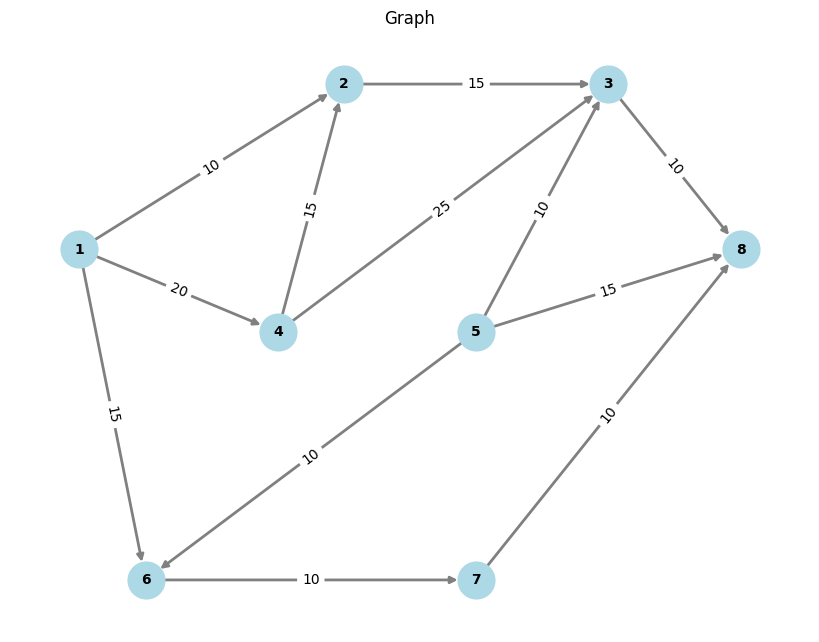

In [ ]:
G_2 = nx.DiGraph()

edges = [
    (1, 2, 10), (2, 3, 15), (3, 8, 10), (1, 4, 20), (4, 2, 15), (4, 3 ,25), (5, 3, 10), (3, 8, 10),
    (1, 6, 15), (5, 6, 10), (5, 8, 15), (6, 7, 10), (7, 8, 10)
]

G_2.add_weighted_edges_from(edges)

positions = {
    1: (-3, 2), 2: (-1, 3), 3: (1, 3), 4: (-1.5, 1.5), 5: (0, 1.5),
    6: (-2.5, 0), 7: (0, 0), 8: (2, 2)
}

plt.figure(figsize=(8, 6))
nx.draw(G_2, pos=positions, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray", width=2)
edge_labels = nx.get_edge_attributes(G_2, 'weight')
nx.draw_networkx_edge_labels(G_2, pos=positions, edge_labels=edge_labels, font_size=10)
plt.title("Graph")
plt.show()

In [ ]:
flow_value, flow_dict = nx.maximum_flow(G_2, 1, 8, capacity='weight')

flow_value, flow_dict

(20,
 {1: {2: 10, 4: 0, 6: 10},
  2: {3: 10},
  3: {8: 10},
  8: {},
  4: {2: 0, 3: 0},
  5: {3: 0, 6: 0, 8: 0},
  6: {7: 10},
  7: {8: 10}})

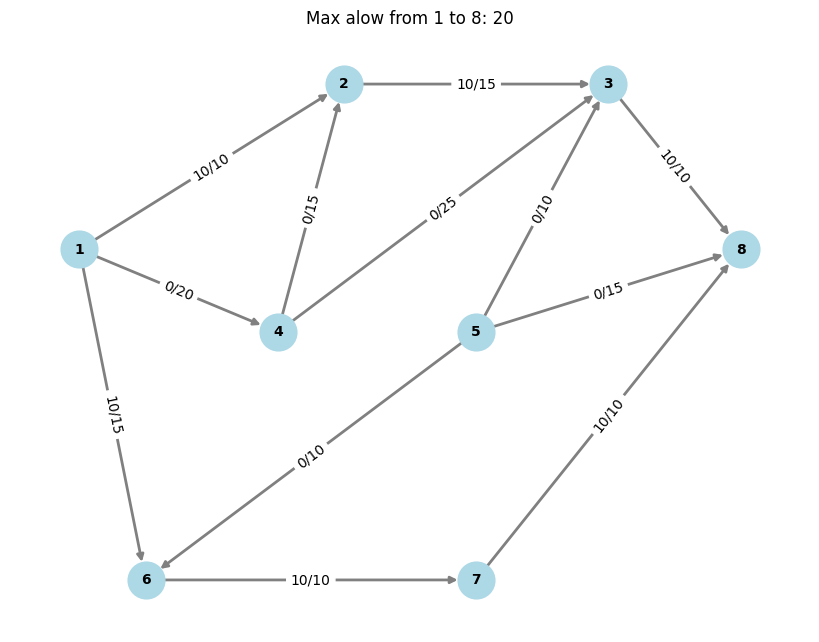

In [ ]:
plt.figure(figsize=(8, 6))
nx.draw(G_2, pos=positions, with_labels=True, node_size=700, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray", width=2, arrows=True)

edge_labels_flow = {}
for u, v in G_2.edges():
    capacity = G_2[u][v]['weight']
    flow = flow_dict[u][v] if v in flow_dict[u] else 0
    edge_labels_flow[(u, v)] = f"{flow}/{capacity}"

nx.draw_networkx_edge_labels(G_2, pos=positions, edge_labels=edge_labels_flow, font_size=10)

plt.title(f"Max аlow from 1 to 8: {flow_value}")
plt.show()